In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
rev = pd.read_csv('expenses.csv')


,Transaction_Type,Season,Amount
0,Expense,Summer,-1745053
1,Expense,Winter,-1673800
2,Revenue,Summer,149830
3,Revenue,Winter,495170


In [36]:
rev.groupby(['Transaction_Type', 'Season','Category'])['Amount'].sum().reset_index()

,Transaction_Type,Season,Category,Amount
0,Expense,Summer,Ambulance Call,-333947
1,Expense,Summer,Equipment Maintenance,-123703
2,Expense,Summer,Staff Salary,-1287403
3,Expense,Winter,Ambulance Call,-341643
4,Expense,Winter,Equipment Maintenance,-116439
5,Expense,Winter,Staff Salary,-1215718
6,Revenue,Summer,Rental,15810
7,Revenue,Summer,Ticket Sale,134020
8,Revenue,Winter,Rental,34400
9,Revenue,Winter,Ticket Sale,460770


In [17]:
df = pd.read_csv('incidents.csv')
df.shape

(1000, 16)

In [21]:
ordinal_mapping_difficulty = {'Easy': 1, "Intermediate": 2, 'Advanced': 3, 'Expert': 4}
ordinal_mapping_skill_level = {'Beginner':1, 'Intermediate':2, 'Advanced':3}
df["Slope_Difficulty_Encoded"] = df["Slope_Difficulty"].map(ordinal_mapping)
df["Skill_Level_Encoded"] = df["Skill_Level"].map(ordinal_mapping_skill_level)
df["Skill_Gap"] = df["Slope_Difficulty_Encoded"] - df["Skill_Level_Encoded"]
df.head()

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length,Slope_Difficulty_Encoded,Skill_Level_Encoded,Skill_Gap
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,6,15,No,0,1,1,0
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0,4,1,3
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,8,13,Yes,1,3,1,2
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,5,9,No,0,3,2,1
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,NaN,Head Injury,8,10,Yes,4,2,1,1


(array([ 47.,   0., 139.,   0., 226.,   0., 305.,   0., 188.,  95.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <BarContainer object of 10 artists>)

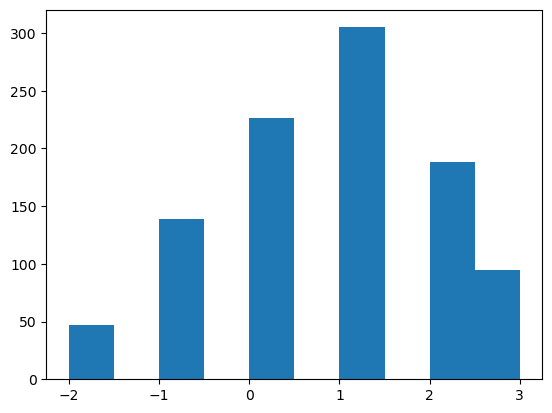

In [22]:
plt.hist(df['Skill_Gap'])

In [31]:
slope = df.groupby("Slope_Name")['Skill_Gap'].median().reset_index()
slope

,Slope_Name,Skill_Gap
0,Blue Ridge,-0.006993
1,Bunny Hill,-1.057377
2,Devil’s Drop,2.028369
3,Rocky Pass,-0.115942
4,Shadow Valley,1.954545
5,Summit Peak,1.057471
6,Thunder Run,1.006667


<BarContainer object of 7 artists>

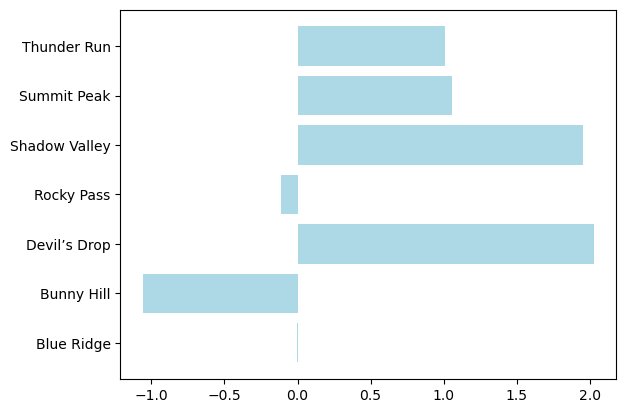

In [38]:
plt.barh(slope['Slope_Name'], slope['Skill_Gap'], color = 'lightblue') 